This notebook is partially from the textbook "Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow".

# Derivatives and optimization

When trying to optimize a function $f(x)$, we look for the values of $x$ that minimize (or maximize) the function.

It is important to note that when a function reaches a minimum or maximum, assuming it is differentiable at that point, the derivative will necessarily be equal to 0. For example, you can check the above animation, and notice that whenever the function $f$ (in the upper graph) reaches a maximum or minimum, then the derivative $f'$ (in the lower graph) is equal to 0.

So one way to optimize a function is to differentiate it and analytically find all the values for which the derivative is 0, then determine which of these values optimize the function (if any). For example, consider the function $f(x)=\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}$. Using the derivative rules (specifically, the sum rule, the product rule, the power rule and the constant rule), we find that $f'(x)=x^3 - 2x$. We look for the values of $x$ for which $f'(x)=0$, so $x^3-2x=0$, and therefore $x(x^2-2)=0$. So $x=0$, or $x=\sqrt2$ or $x=-\sqrt2$. As you can see on the following graph of $f(x)$, these 3 values correspond to local extrema. Two global minima $f\left(\sqrt2\right)=f\left(-\sqrt2\right)=-\dfrac{1}{2}$ and one local maximum $f(0)=\dfrac{1}{2}$.

In [1]:
#@title
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

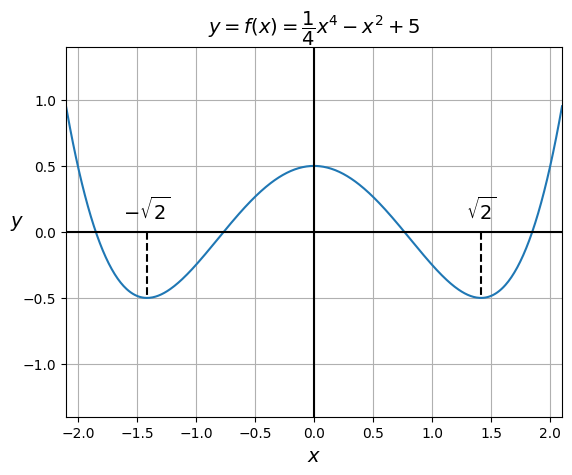

In [2]:



def f(x):
  return 1/4 * x**4 - x**2 + 1/2

xs = np.linspace(-2.1, 2.1, 500)
ys = f(xs)
plt.plot(xs, ys)
plt.plot([np.sqrt(2), np.sqrt(2)], [0, f(np.sqrt(2))], "k--")
plt.plot([-np.sqrt(2), -np.sqrt(2)], [0, f(-np.sqrt(2))], "k--")
plt.text(-np.sqrt(2), 0.1, r"$-\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
plt.text(np.sqrt(2), 0.1, r"$\sqrt{2}$",
         fontsize=14, horizontalalignment="center")
show(axis=[-2.1, 2.1, -1.4, 1.4], title=r"$y=f(x)=\dfrac{1}{4}x^4 - x^2 + 5$")

If a function has a local extremum at a point $x_\mathrm{A}$ and is differentiable at that point, then $f'(x_\mathrm{A})=0$. However, the reverse is not always true. For example, consider $f(x)=x^3$. Its derivative is $f'(x)=x^2$, which is equal to 0 at $x_\mathrm{A}=0$. Yet, this point is _not_ an extremum, as you can see on the following diagram. It's just a single point where the slope is 0.

So in short, you can optimize a function by analytically working out the points at which the derivative is 0, and then investigating only these points. It's a beautifully elegant solution, but it requires a lot of work, and it's not always easy, or even possible. For neural networks, it's practically impossible.

# Gradient Descent

We will consider minimizing the function, but the process would be almost identical if we tried to maximize a function instead. Start at a random point $x_0$, then use the function's derivative to determine the slope at that point, and move a little bit in the downwards direction, then repeat the process until you reach a local minimum, and cross your fingers in the hope that this happens to be the global minimum.

At each iteration, the step size is proportional to the slope, so the process naturally slows down as it approaches a local minimum. Each step is also proportional to the learning rate: a parameter of the Gradient Descent algorithm itself (since it is not a parameter of the function we are optimizing, it is called a **hyperparameter**).

Here is an animation of this process on the function $f(x)=\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}$:

In [21]:
#@title
def animate_gradient_descent(f, fp, f_str, x_0):
    learning_rate = 0.01
    n_frames = 200
    x_min, x_max = -1000, 1000

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # plot f
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax1.plot(xs, ys)

    # plot tangent
    line_tangent, = ax1.plot([x_min, x_max], [0, 0])

    # plot f'
    xs = np.linspace(-2.1, 2.1, 500)
    ys = fp(xs)
    ax2.plot(xs, ys, "r-")

    # plot points A
    point_A1, = ax1.plot(0, 0, "bo")
    point_A2, = ax2.plot(0, 0, "bo")

    show([-2.1, 2.1, -1.4, 1.4], ax=ax1, ylabel="$f(x)$",
        title=r"$y=f(x)=" + f_str + r"$ and the tangent at $x=x_\mathrm{A}$")
    show([-2.1, 2.1, -4.2, 4.2], ax=ax2, ylabel="$f'(x)$",
        title=r"$y=f'(x)$ and the slope of the tangent at $x=x_\mathrm{A}$")

    xs = []
    x = x_0
    for index in range(n_frames):
      xs.append(x)
      slope = fp(x)
      x = x - slope * learning_rate

    def update_graph(i):
        x = xs[i]
        f_x = f(x)
        df_dx = fp(x)
        offset = f_x - df_dx * x
        line_tangent.set_data([x_min, x_max],
                              [df_dx * x_min + offset, df_dx * x_max + offset])
        point_A1.set_data([x], [f_x])
        point_A2.set_data([x], [df_dx])
        return [line_tangent, point_A1, point_A2]

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

def f(x):
  return 1/4 * x**4 - x**2 + 1/2

def fp(x):
  return x**3 - 2*x

animate_gradient_descent(f, fp, r"\dfrac{1}{4}x^4 - x^2 + \dfrac{1}{2}",
                         x_0=1/4)

Output hidden; open in https://colab.research.google.com to view.

In this example, we started with $x_0 = \dfrac{1}{4}$, so Gradient Descent "rolled down" towards the minimum value at $x = \sqrt2$. But if we had started at $x_0 = -\dfrac{1}{4}$, it would have gone towards $-\sqrt2$. This illustrates the fact that the initial value is important: depending on $x_0$, the algorithm may converge to a global minimum or to a poor local minimum or stay stuck on a plateau, such as a horizontal inflection point.

# Higher order derivatives

What happens if we try to differentiate the function $f'(x)$? Well, we get the so-called second order derivative, noted $f''(x)$, or $\dfrac{\mathrm{d}^2f}{\mathrm{d}x^2}$. If we repeat the process by differentiating $f''(x)$, we get the third-order derivative $f'''(x)$, or $\dfrac{\mathrm{d}^3f}{\mathrm{d}x^3}$. And we could go on to get higher order derivatives.

What's the intuition behind second order derivatives? Well, since the (first order) derivative represents the instantaneous rate of change of $f$ at each point, the second order derivative represents the instantaneous rate of change of the rate of change itself, in other words, you can think of it as the **acceleration** of the curve: if $f''(x) < 0$, then the curve is accelerating "downwards", if $f''(x) > 0$ then the curve is accelerating "upwards", and if $f''(x) = 0$, then the curve is locally a straight line. Note that a curve could be going upwards (i.e., $f'(x)>0$) but also be accelerating downwards (i.e., $f''(x) < 0$): for example, imagine the path of a stone thrown upwards, as it is being slowed down by gravity (which constantly accelerates the stone downwards).

Machine Learning generally only uses first order derivatives, but you will sometimes run into some optimization algorithms or cost functions based on second order derivatives.

# Partial derivatives

Up to now, we have only considered functions with a single variable $x$. What happens when there are multiple variables? For example, let's start with a simple function with 2 variables: $f(x,y)=\sin(xy)$. If we plot this function, using $z=f(x,y)$, we get the following 3D graph. I also plotted some point $\mathrm{A}$ on the surface, along with two lines I will describe shortly.

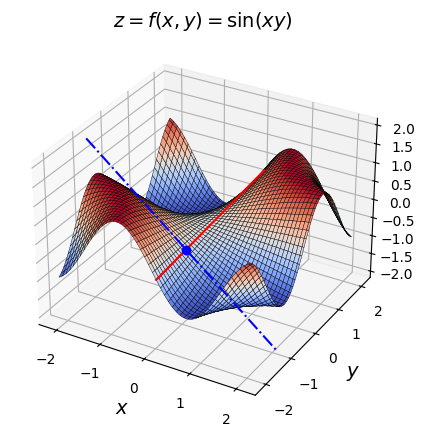

In [4]:
#@title
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(f, title):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d')

    xs = np.linspace(-2.1, 2.1, 100)
    ys = np.linspace(-2.1, 2.1, 100)
    xs, ys = np.meshgrid(xs, ys)
    zs = f(xs, ys)

    surface = ax.plot_surface(xs, ys, zs,
                              cmap=mpl.cm.coolwarm,
                              linewidth=0.3, edgecolor='k')

    ax.set_xlabel("$x$", fontsize=14)
    ax.set_ylabel("$y$", fontsize=14)
    ax.set_zlabel("$z$", fontsize=14)
    ax.set_title(title, fontsize=14)
    return ax

def plot_tangents(ax, x_A, y_A, f, df_dx, df_dy):
    ax.plot3D([x_A], [y_A], f(x_A, y_A), "bo", zorder=10)
    x_min, x_max = -2.1, 2.1
    slope_x = df_dx(x_A, y_A)
    offset_x = f(x_A, y_A) - slope_x * x_A
    ax.plot3D([x_min, x_max], [y_A, y_A],
              [slope_x * x_min + offset_x, slope_x * x_max + offset_x], "b-.",
              zorder=5)
    y_min, y_max = -2.1, 2.1
    slope_y = df_dy(x_A, y_A)
    offset_y = f(x_A, y_A) - slope_y * y_A
    ax.plot3D([x_A, x_A], [y_min, y_max],
              [slope_y * y_min + offset_y, slope_y * y_max + offset_y], "r-",
              zorder=5)

def f(x, y):
    return np.sin(x * y)

def df_dx(x, y):
    return y * np.cos(x * y)

def df_dy(x, y):
    return x * np.cos(x * y)

ax = plot_3d(f, r"$z = f(x, y) = \sin(xy)$")
plot_tangents(ax, 0.1, -1, f, df_dx, df_dy)


plt.show()

# Gradients

So far we have considered only functions with a single variable $x$, or with 2 variables, $x$ and $y$, but the previous paragraph also applies to functions with more variables. So let's consider a function $f$ with $n$ variables: $f(x_1, x_2, \dots, x_n)$. For convenience, we will define a vector $\mathbf{x}$ whose components are these variables:

$\mathbf{x}=\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}$

Now $f(\mathbf{x})$ is easier to write than $f(x_1, x_2, \dots, x_n)$.

The gradient of the function $f(\mathbf{x})$ at some point $\mathbf{x}_\mathrm{A}$ is the vector whose components are all the partial derivatives of the function at that point. It is noted $\nabla f(\mathbf{x}_\mathrm{A})$, or sometimes $\nabla_{\mathbf{x}_\mathrm{A}}f$:

$\nabla f(\mathbf{x}_\mathrm{A}) = \begin{pmatrix}
\dfrac{\partial f}{\partial x_1}(\mathbf{x}_\mathrm{A})\\
\dfrac{\partial f}{\partial x_2}(\mathbf{x}_\mathrm{A})\\
\vdots\\\
\dfrac{\partial f}{\partial x_n}(\mathbf{x}_\mathrm{A})\\
\end{pmatrix}$

# Jacobians

Until now we have only considered functions that output a scalar, but it is possible to output vectors instead. For example, a classification neural network typically outputs one probability for each class, so if there are $m$ classes, the neural network will output an $d$-dimensional vector for each input.

In Machine Learning we generally only need to differentiate the loss function, which almost always outputs a single scalar number. But suppose for a second that you want to differentiate a function $\mathbf{f}(\mathbf{x})$ which outputs $d$-dimensional vectors. The good news is that you can treat each _output_ dimension independently of the others. This will give you a partial derivative for each input dimension and each output dimension. If you put them all in a single matrix, with one column per input dimension and one row per output dimension, you get the so-called **Jacobian matrix**.

$
\mathbf{J}_\mathbf{f}(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial f_1}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_1}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_1}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial f_2}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_2}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_2}{\partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial f_m}{\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial f_m}{\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial f_m}{\partial x_n}(\mathbf{x}_\mathbf{A})
\end{pmatrix}
$

The partial derivatives themselves are often called the **Jacobians**. It's just the first order partial derivatives of the function $\mathbf{f}$.

# Hessians

Let's come back to a function $f(\mathbf{x})$ which takes an $n$-dimensional vector as input and outputs a scalar. If you determine the equation of the partial derivative of $f$ with regards to $x_i$ (the $i^\text{th}$ component of $\mathbf{x}$), you will get a new function of $\mathbf{x}$: $\dfrac{\partial f}{\partial x_i}$. You can then compute the partial derivative of this function with regards to $x_j$ (the $j^\text{th}$ component of $\mathbf{x}$). The result is a partial derivative of a partial derivative: in other words, it is a **second order partial derivatives**, also called a **Hessian**. It is noted $\mathbf{x}$: $\dfrac{\partial^2 f}{\partial x_jx_i}$. If $i\neq j$ then it is called a **mixed second order partial derivative**.
Or else, if $j=i$, it is noted $\dfrac{\partial^2 f}{\partial {x_i}^2}$

$
\mathbf{H}_f(\mathbf{x}_\mathbf{A}) = \begin{pmatrix}
\dfrac{\partial^2 f}{\partial {x_1}^2}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_1\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\dfrac{\partial^2 f}{\partial x_2\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial {x_2}^2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial x_2\, \partial x_n}(\mathbf{x}_\mathbf{A})\\
\vdots && \vdots && \ddots && \vdots \\
\dfrac{\partial^2 f}{\partial x_n\,\partial x_1}(\mathbf{x}_\mathbf{A})
&& \dfrac{\partial^2 f}{\partial x_n\,\partial x_2}(\mathbf{x}_\mathbf{A})
&& \dots
&& \dfrac{\partial^2 f}{\partial {x_n}^2}(\mathbf{x}_\mathbf{A})\\
\end{pmatrix}
$

There are great optimization algorithms which take advantage of the Hessians, but in practice Machine Learning almost never uses them.

## Gradient Descent, revisited

In Machine Learning, the Gradient Descent algorithm we discussed earlier is based on gradients instead of derivatives (hence its name). It works in much the same way, but using vectors instead of scalars: simply start with a random vector $\mathbf{x}_0$, then compute the gradient of $f$ at that point, and perform a small step in the opposite direction, then repeat until convergence. More precisely, at each step $t$, compute $\mathbf{x}_t = \mathbf{x}_{t-1} - \eta \nabla f(\mathbf{x}_{t-1})$. The constant $\eta$ is the learning rate, typically a small value such as $10^{-3}$. In practice, we generally use more efficient variants of this algorithm, but the general idea remains the same.

In Machine Learning, the letter $\mathbf{x}$ is generally used to represent the input data. When you _use_ a neural network to make predictions, you feed the neural network the inputs $\mathbf{x}$, and you get back a prediction $\hat{y} = f(\mathbf{x})$. The function $f$ treats the model parameters as constants. We can use more explicit notation by writing $\hat{y} = f_\mathbf{w}(\mathbf{x})$, where $\mathbf{w}$ represents the model parameters and indicates that the function relies on them, but treats them as constants.



In [5]:
def gradient_descent(J_grad, x_init, alpha=0.001, epsilon=1e-6, max_iterations=10000):
    x = x_init
    x_store = np.array([x])
    for i in range(max_iterations):
        x = x - alpha * J_grad(x)
        x_store=np.append(x_store,np.array([x]), axis=0)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1, x_store
    return x, max_iterations, x_store

## Gradient Descent + Optimal step size(line search)

Instead of using constant learning rate $\alpha$, here we want to find the optimal $\alpha$ at every iteration. Since at every step, the update is:

$\mathbf{x}_t = \mathbf{x}_{t-1} - \alpha \nabla f(\mathbf{x}_{t-1})$.

We want to make sure, that the chosen $\alpha$ is going to minimize as much as possible the target function $f$. Therefore, we want $\alpha$ to be such that:

$\alpha_t = \underset{\alpha}{argmin} f(\mathbf{x}_t - \alpha \nabla f(\mathbf{x}_t))$

Since at iteration $t$, $\mathbf{x}_t$ and $\nabla f(\mathbf{x}_t)$ are constants, we can define $q(\alpha)$:

$q(\alpha) = f(\mathbf{x}_t - \alpha \nabla f(\mathbf{x}_t))$

that is a function of one variable, $\alpha$. Therefore, we want to find the right $\alpha$ that will minimize $q$. That task can be solved for instance using gradient descent itself, but since we know that $\alpha$ is bounded, we are going to use another algorithm more suited for this task: Golden Section Search (or bisection method).

In [6]:
def gss(f, a, b, tol=1e-7):
    phi = (np.sqrt(5) + 1) / 2
    d = b - (b - a) / phi
    c = a + (b - a) / phi

    while abs(d - c) > tol:
        if f(d) < f(c):
            b = c
        else:
            a = d

        d = b - (b - a) / phi
        c = a + (b - a) / phi

    return (a + b) / 2

def gradient_descent_optimal(J, J_grad, x_init, epsilon=1e-6, max_iterations=1000):
    x = x_init
    x_store = np.array([x])
    for i in range(max_iterations):
        q = lambda alpha: J(x - alpha * J_grad(x))
        alpha = gss(q, 0, 1)
        x = x - alpha * J_grad(x)
        x_store=np.append(x_store,np.array([x]), axis=0)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1, x_store
    return x, max_iterations, x_store

## Newton's  method

The iterative scheme is $\mathbf{x}_t = \mathbf{x}_{t-1} - \mathbf{H}_f(\mathbf{x}_\mathbf{A})^{-1}\cdot \nabla f(\mathbf{x}_\mathrm{A})$. A comparison of gradient descent and Newton's method for minimizing a function (with small step sizes). Newton's method uses curvature information (i.e. the second derivative) to take a more direct route. The geometric interpretation of Newton's method is that at each iteration, it amounts to the fitting of a parabola to the graph of $f(\mathbf{x})$ at the trial value $\mathbf{x}_{t}$, having the same slope and curvature as the graph at that point, and then proceeding to the maximum or minimum of that parabola (in higher dimensions, this may also be a saddle point), see below. Note that if $f$ happens to be a quadratic function, then the exact extremum is found in one step.

In [7]:
def newton(J_grad, J_hess, x_init, epsilon=1e-6, max_iterations=10000):
    x = x_init
    x_store = np.array([x])
    for i in range(max_iterations):
        x = x - np.linalg.solve(J_hess(x), J_grad(x))
        x_store=np.append(x_store,np.array([x]), axis=0)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1, x_store
    return x, max_iterations, x_store

## EXAMPLES

# Rosenbrock function
The Rosenbrock function is a classical benchmark for optimization algorithms. It is defined by the following equation:
$f(x,y) = (a - x)^2 + b * (y - x^2)^2$

It has a global minimum at $(x,y)=(a,a^2)$, where $f(x,y)=0$.

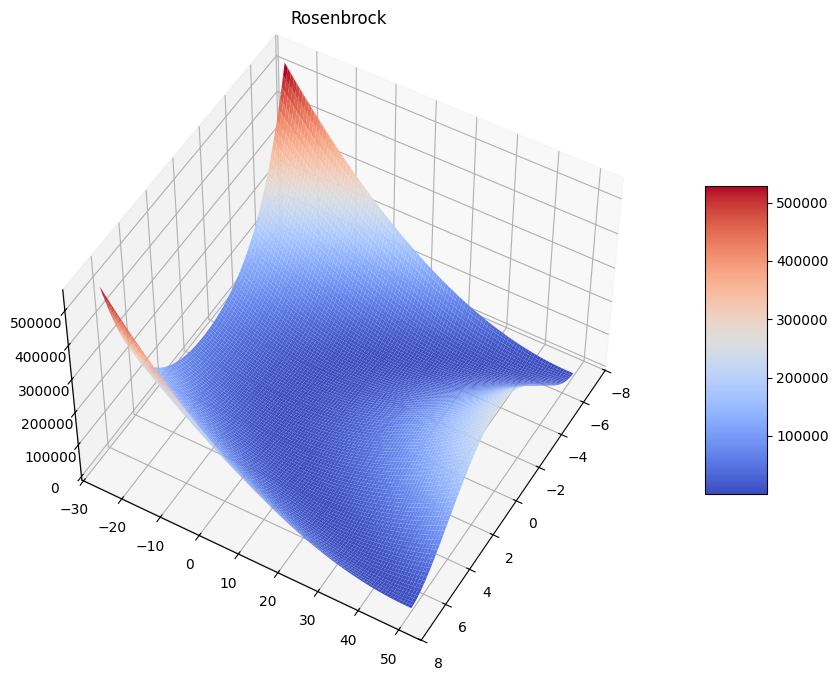

In [8]:
def rosenbrock(X, a=1, b=100):
    x, y = X
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(X, a=1, b=100):
    x, y = X
    return np.array([
        2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

def rosenbrock_hess(X, a=1, b=100):
    x, y = X
    return np.matrix([
        [2 - 4 * b * (y - 3 * x**2), -4 * b * x],
        [-4 * b * x, 2 * b]
    ])


x = np.linspace(-7, 7, 100)
y = np.linspace(-25, 50, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock((X, Y))

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection='3d')
ax.set_title('Rosenbrock')
ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, edgecolor='none')
fig.colorbar(s, shrink=0.5, aspect=5)

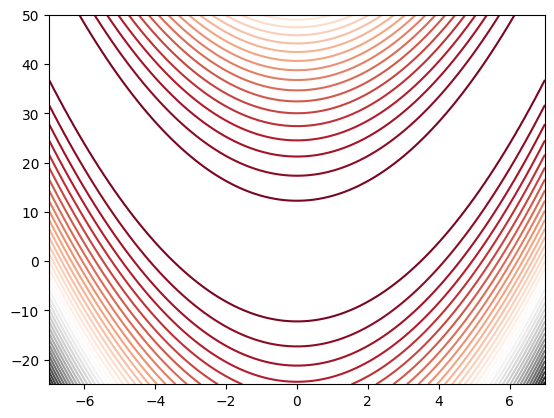

In [9]:
plt.contour(X, Y, Z, 40, cmap='RdGy');

In [10]:
# Rosenbrock takes 2 input variables that we set to 0 at first (gradient descent)
x_init = np.zeros(2)
x_min, it_GD,x_store_GD = gradient_descent(rosenbrock_grad, x_init, alpha=0.002, max_iterations=5000)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it_GD)

x* = [0.99440769 0.98882419]
Rosenbrock(x*) = 3.132439308613923e-05
Grad Rosenbrock(x*) = [-0.00225342 -0.00449072]
Iterations = 5000


In [11]:
# The Rosenbrock function takes 2 inputs (gradient descent with optimal time step)
x_init = np.zeros(2)
x_min, it_GD_opt, x_store_GD_opt = gradient_descent_optimal(rosenbrock, rosenbrock_grad, x_init, epsilon=1e-6,max_iterations=5000)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it_GD_opt)


x* = [0.99943181 0.99886375]
Rosenbrock(x*) = 3.2284815620935435e-07
Grad Rosenbrock(x*) = [-1.06162391e-03 -3.74035063e-05]
Iterations = 5000


In [12]:
# The Rosenbrock function takes 2 inputs (newton's method)
x_init = np.zeros(2)
x_min, it_new, x_store_new = newton(rosenbrock_grad, rosenbrock_hess, x_init)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it_new)

x* = [1. 1.]
Rosenbrock(x*) = 0.0
Grad Rosenbrock(x*) = [0. 0.]
Iterations = 2


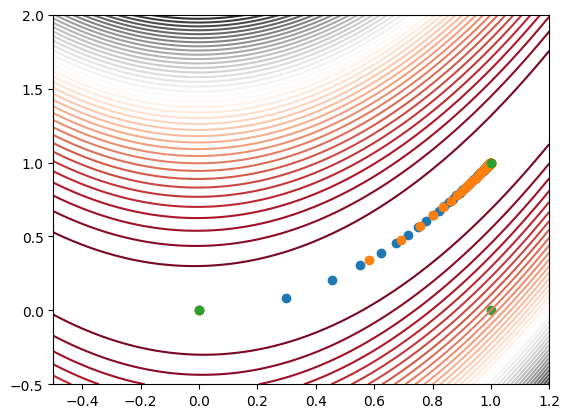

In [13]:
# plot
x = np.linspace(-0.5, 1.2, 100)
y = np.linspace(-0.5, 2, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock((X, Y))
plt.contour(X, Y, Z, 40, cmap='RdGy');

plt.scatter(x_store_GD[0::100,0], x_store_GD[0::100,1])
plt.scatter(x_store_GD_opt[0::100,0], x_store_GD_opt[0::100,1])
plt.scatter(x_store_new[:,0], x_store_new[:,1])

# Himmelblau's function

$f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2$

The Himmelblau's function has one local maximum at $(x,y) = (-0.270845, -0.923039)$ where $f(x,y)=181.617$, and four identical local minima:

$
f(3.0,2.0)=0 \\
f(-2.805118,3.131312)=0 \\
f(-3.779310,-3.283186)=0 \\
f(3.584428,-1.848126)=0
$

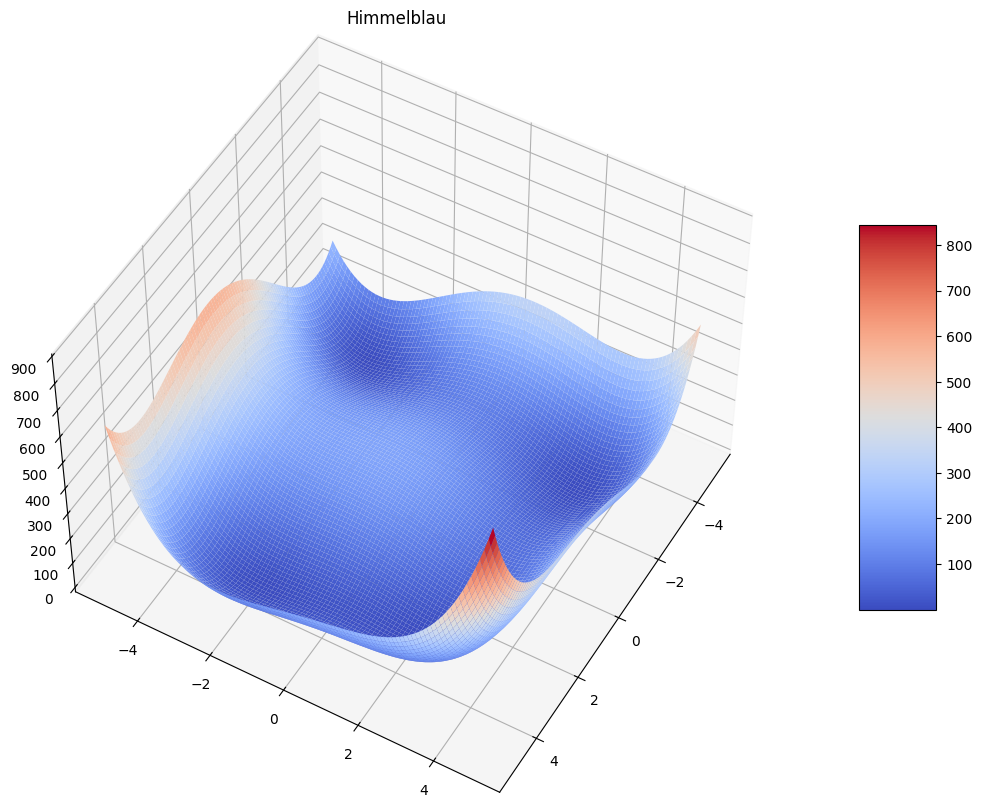

In [14]:
def himmelblau(X):
    x, y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def himmelblau_grad(X):
    x, y = X
    return np.array([
        4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7),
        2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    ])

def himmelblau_hess(X):
    x, y = X
    return np.array([
        [2 - 400 * (y - 3 * x**2), -400 * x],
        [-400 * x, 200]
    ])

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau((X, Y))

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.set_title('Himmelblau')
ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, edgecolor='none')
fig.colorbar(s, shrink=0.5, aspect=5)

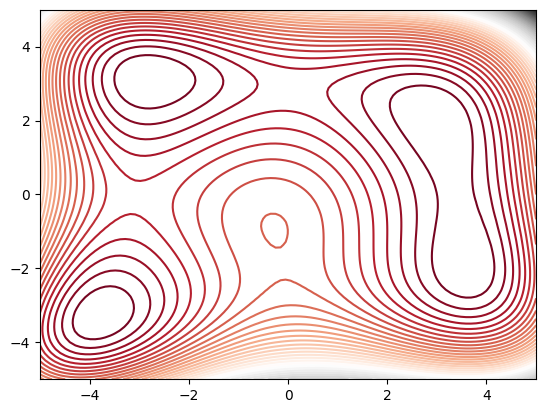

In [15]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau((X, Y))
plt.contour(X, Y, Z, 50, cmap='RdGy');

In [16]:
# The Himmelblau function takes 2 inputs (gradient descent)
x_init = np.ones(2)
x_min, it_GD, x_store_GD = gradient_descent(himmelblau_grad, x_init)
print('x* =', x_min)
print('Himmelblau(x*) =', himmelblau(x_min))
print('Grad Himmelblau(x*) =', himmelblau_grad(x_min))
print('Iterations =', it_GD)

x* = [2.99999999 2.00000004]
Himmelblau(x*) = 1.9220781736638453e-14
Grad Himmelblau(x*) = [-3.80486853e-07  9.18576401e-07]
Iterations = 613


In [17]:
# The Himmelblau function takes 2 inputs (gradient descent, optimal step)
x_init = np.ones(2)
x_min, it_GD_opt, x_store_GD_opt = gradient_descent_optimal(himmelblau, himmelblau_grad, x_init)
print('x* =', x_min)
print('Himmelblau(x*) =', himmelblau(x_min))
print('Grad Himmelblau(x*) =', himmelblau_grad(x_min))
print('Iterations =', it_GD_opt)

x* = [2.99999999 2.00000003]
Himmelblau(x*) = 1.175127377111827e-14
Grad Himmelblau(x*) = [-5.10508535e-07  6.17894524e-07]
Iterations = 15


In [18]:
# The Himmelblau function takes 2 inputs (Newton's method)
x_init = np.ones(2)*2
x_min, it_new, x_store_new = newton(himmelblau_grad, himmelblau_hess, x_init, max_iterations=2000)
print('x* =', x_min)
print('Himmelblau(x*) =', himmelblau(x_min))
print('Grad Himmelblau(x*) =', himmelblau_grad(x_min))
print('Iterations =', it_new)

x* = [2.99998369 2.00001304]
Himmelblau(x*) = 8.47832836013807e-09
Grad Himmelblau(x*) = [-0.0009459   0.00011735]
Iterations = 2000


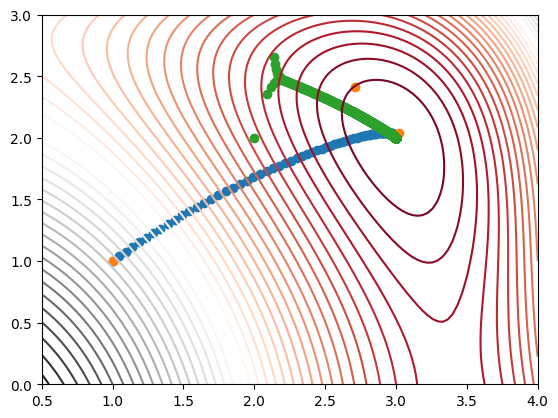

In [19]:
x = np.linspace(0.5,4, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau((X, Y))

plt.contour(X, Y, Z, 50, cmap='RdGy');
plt.scatter(x_store_GD[:,0], x_store_GD[:,1])
plt.scatter(x_store_GD_opt[:,0], x_store_GD_opt[:,1])
plt.scatter(x_store_new[:,0], x_store_new[:,1])